In [1]:
import pandas as pd
#%matplotlib notebook
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np
import matplotlib.pyplot as plt
import dateutil
import dateutil.parser
import time


from bokeh.plotting import figure, output_file
from bokeh.charts import Bar, output_file, show
import bokeh.plotting as bplt
from bokeh.palettes import Dark2_5 as palette
from bokeh.models import Label, Title
import itertools  
from bokeh.layouts import gridplot,row,column

#from bokeh.io import hplot, output_file, show
from bokeh.plotting import figure

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from bokeh.io import output_notebook
plt.style.use('ggplot')
#output_notebook()
import plotlib as pltme

Loading BokehJS ...

In [2]:
directory = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/'
directory = directory + '1-node/'

In [3]:
producers = '8-1-2-new-settings/producers/'
adir = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/1-node/8-1-2-new-settings/producers/'
dataset =  pltme.find_producers_file(adir)

def producer_throughtput_per_mini_batch(adir,producers):
    
    from operator import add
    
    first_pass = True
    for producer in producers:
        producer_data =  pd.read_csv(adir + producer)
        timestamps = producer_data['TimeStamp']
        timestamps_list = timestamps.tolist()
        sent_messages_count = 0
        message_list = []
        start_time  = time.mktime(dateutil.parser.parse(timestamps_list[0]).timetuple()) 
        
        for atime in timestamps_list:
            cur_time = time.mktime(dateutil.parser.parse(atime).timetuple()) 
            if abs(start_time - cur_time) > 60: 
                message_list.append(sent_messages_count)
                start_time = cur_time
                sent_messages_count = 0
            else:
                sent_messages_count+=1
        
        ## I only create this list the first time, becasue I need to know the size of the list
        if first_pass:
            all_messages_list = [0]*len(message_list)
            first_pass=False
        
        while len(all_messages_list) < len(message_list):
            all_messages_list.append(0)
        
        while len(message_list) < len(all_messages_list):
            message_list.append(0)
            
        all_messages_list = map(add,all_messages_list,message_list)
            
    mb_per_second = []
    for record in all_messages_list:
        mb = (record*8*5000*3/1024**2)/60   # (record*DoublePrecisionFloat_bytes*Total_points*dimensions_of_points/convertion_to_mbs)/window_size)
        mb_per_second.append(mb)
        
    x_axis = np.linspace(1,len(all_messages_list),num=len(all_messages_list),endpoint=True)
                
    return (x_axis,all_messages_list,mb_per_second)
        
    
    

## 8-1-1 new settings

In [5]:
throughput_p811_1 = producer_throughtput_per_mini_batch(adir,dataset)  # record per seconds
throughin_811 = pltme.plot_throughput_per_mini_batch('8-1-1-new-settings/spark-metrics-20171108-105454.csv',1,showPlot=False)
processing_time_811 =  pltme.plot_scheduling_and_Total_Delay('8-1-1-new-settings/spark-metrics-20171108-105454.csv',1,'title',showPlot=True)
#processing_records_per_second_per_batch_811 = pltme.rec_per_sec(processing_time_811,throughin_811)
#average_record_throughin = pltme.find_total_consumer_throughin('8-1-2-new-settings/spark-metrics-20171107-234051.csv',17*60)  #5400
#print ' Through-in rate is: %d Records/sec ' % average_record_throughin

## all producers
producers = '8-1-1-new-settings/producers/'
adir = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/1-node/8-1-1-new-settings/producers/'
dataset =  pltme.find_producers_file(adir)
#avg_production_rate_811 = pltme.find_total_producer_throughput(producers,dataset,950,False,'')

## 8-1-2-new settings

In [7]:
throughput_p812_1 = producer_throughtput_per_mini_batch(adir,dataset)  # record per seconds
throughput_p812_1 = producer_throughtput_per_mini_batch(adir,dataset)  # record per seconds
throughin_812 = pltme.plot_throughput_per_mini_batch('8-1-2-new-settings/spark-metrics-20171107-234051.csv',1,showPlot=False)
processing_time_812 =  pltme.plot_scheduling_and_Total_Delay('8-1-2-new-settings/spark-metrics-20171107-234051.csv',1,'title',showPlot=True)
processing_records_per_second_per_batch_812 = pltme.rec_per_sec(processing_time_812,throughin_812)
average_record_throughin = pltme.find_total_consumer_throughin('8-1-2-new-settings/spark-metrics-20171107-234051.csv',17*60)  #5400
print ' Through-in rate is: %d Records/sec ' % average_record_throughin

## all producers
producers = '8-1-2-new-settings/producers/'
adir = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/1-node/8-1-2-new-settings/producers/'
dataset =  pltme.find_producers_file(adir)
avg_production_rate_812 = pltme.find_total_producer_throughput(producers,dataset,950,False,'')

 Through-in rate is: 174 Records/sec 


(0, 20)

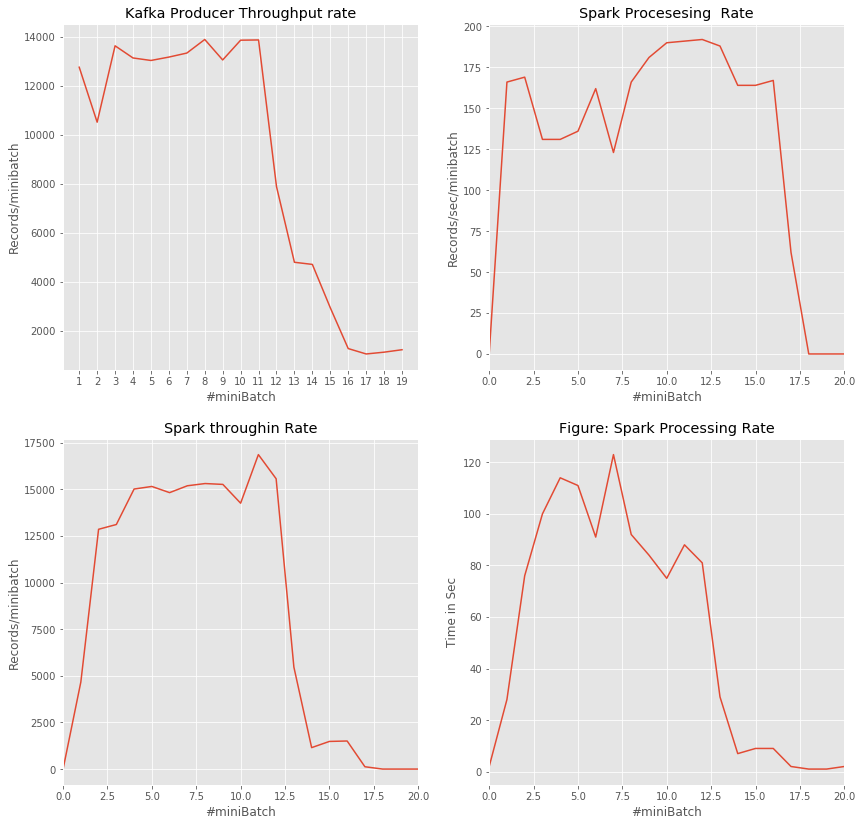

In [8]:
temp = 20
fig, axes = plt.subplots(nrows=2,ncols=2,sharex=False)
fig.set_size_inches(14,14)
#plt.subplot(221)
axes[0,0].plot(throughput_p812_1[0],throughput_p812_1[1])    # [1] : has the rate in Records whereas [2] has the data in MB/s
axes[0,0].set_yscale('linear')
axes[0,0].set_title('Kafka Producer Throughput rate')  #set_title('Avg Prod Rate: ' + str(avg_production_rate_812[0]) + " Rec/sec or " + str(avg_production_rate_812[0]*5000*3*8/1024**2) + " MB/s")
axes[0,0].set_xlabel('#miniBatch')
axes[0,0].set_ylabel('Records/minibatch')
axes[0,0].set_xticks(throughput_p812_1[0])
#ax.set_xticks(range(6))
#ax.set_xticklabels([str(x)+"foo" for x in range(6)], rotation=45

#plt.subplot(222)
axes[0,1].plot(processing_records_per_second_per_batch_812[0],processing_records_per_second_per_batch_812[1])
axes[0,1].set_title('Spark Procesesing  Rate')
axes[0,1].set_ylabel('Records/sec/minibatch')
axes[0,1].set_xlabel('#miniBatch')
axes[0,1].set_xlim([0, temp])


#plt.subplot(223)
axes[1,0].plot(throughin_812[0],throughin_812[1])
axes[1,0].set_title('Spark throughin Rate')
axes[1,0].set_ylabel('Records/minibatch')
axes[1,0].set_xlabel('#miniBatch')
axes[1,0].set_xlim([0, temp])


#plt.subplot(224)
axes[1,1].plot(processing_time_812[0],processing_time_812[1])
axes[1,1].set_title('Figure: Spark Processing Rate')
axes[1,1].set_xlabel('#miniBatch')
axes[1,1].set_ylabel('Time in Sec')
axes[1,1].set_xlim([0, temp])


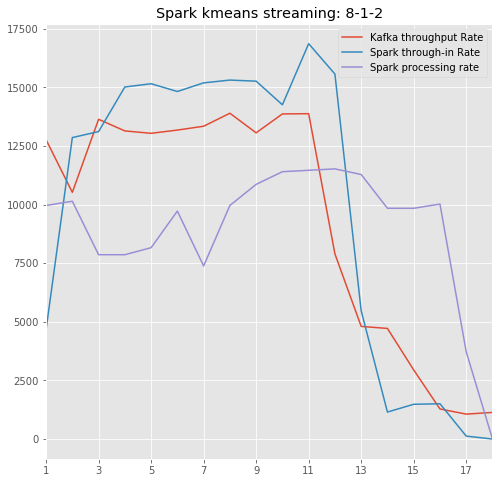

In [9]:
fig = plt.figure()
fig.set_size_inches(8,8)
ax = plt.axes()


ax.set_title('Spark kmeans streaming: 8-1-2')
ax.set_xlim([1,18])
ax.set_xticks([1,3,5,7,9,11,13,15,17])


#throughput rate
ax.plot(throughput_p812_1[0],throughput_p812_1[1],label='Kafka throughput Rate') 

# through-in rate
ax.plot(throughin_812[0],throughin_812[1],label='Spark through-in Rate')

# processing rate .  
ax.plot(processing_records_per_second_per_batch_812[0],map(lambda x: x*60,processing_records_per_second_per_batch_812[1]),label='Spark processing rate')

ax.legend()

## Spark 8-1-4

In [10]:
throughput_p814_1 = producer_throughtput_per_mini_batch(adir,dataset)  # record per seconds
throughput_p814_1 = producer_throughtput_per_mini_batch(adir,dataset)  # record per seconds
throughin_814 = pltme.plot_throughput_per_mini_batch('8-1-4-new-settings/spark-metrics-20171027-112554.csv',1,showPlot=False)
processing_time_814 =  pltme.plot_scheduling_and_Total_Delay('8-1-4-new-settings/spark-metrics-20171027-112554.csv',1,'title',showPlot=True)
processing_records_per_second_per_batch_814 = pltme.rec_per_sec(processing_time_814,throughin_814)
average_record_throughin = pltme.find_total_consumer_throughin('8-1-4-new-settings/spark-metrics-20171027-112554.csv',17*60)  #5400
print ' Through-in rate is: %d Records/sec ' % average_record_throughin

## all producers
producers = '8-1-4-new-settings/producers/'
adir = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/1-node/8-1-4-new-settings/producers/'
dataset =  pltme.find_producers_file(adir)
avg_production_rate_814 = pltme.find_total_producer_throughput(producers,dataset,950,False,'')

 Through-in rate is: 174 Records/sec 


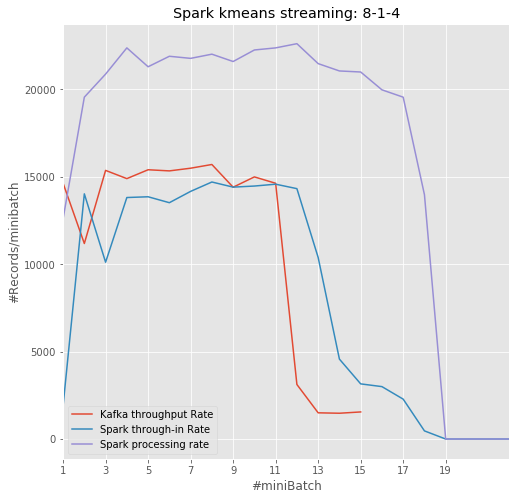

In [11]:
fig = plt.figure()
fig.set_size_inches(8,8)
ax = plt.axes()


ax.set_title('Spark kmeans streaming: 8-1-4')
ax.set_xlim([1,22])
ax.set_xticks([1,3,5,7,9,11,13,15,17,19])
ax.set_xlabel('#miniBatch')
ax.set_ylabel('#Records/minibatch')


#throughput rate
ax.plot(throughput_p814_1[0],throughput_p814_1[1],label='Kafka throughput Rate') 

# through-in rate
ax.plot(throughin_814[0],throughin_814[1],label='Spark through-in Rate')

# processing rate .  
ax.plot(processing_records_per_second_per_batch_814[0],map(lambda x: x*60,processing_records_per_second_per_batch_814[1]),label='Spark processing rate')

ax.legend()

## Spark 16-1-8

In [12]:
## all producers
producers = '16-1-8-new-settings/producers/'
adir = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/1-node/16-1-8-new-settings/producers/'
dataset =  pltme.find_producers_file(adir)


avg_production_rate_814 = pltme.find_total_producer_throughput(producers,dataset,950,False,'')
throughput_p814_1 = producer_throughtput_per_mini_batch(adir,dataset)  # record per seconds
throughin_814 = pltme.plot_throughput_per_mini_batch('16-1-8-new-settings/spark-metrics-20171108-152905.csv',1,showPlot=False)
processing_time_814 =  pltme.plot_scheduling_and_Total_Delay('16-1-8-new-settings/spark-metrics-20171108-152905.csv',1,'title',showPlot=True)
processing_records_per_second_per_batch_814 = pltme.rec_per_sec(processing_time_814,throughin_814)
average_record_throughin = pltme.find_total_consumer_throughin('16-1-8-new-settings/spark-metrics-20171108-152905.csv',17*60)  #5400
print ' Through-in rate is: %d Records/sec ' % average_record_throughin



 Through-in rate is: 348 Records/sec 


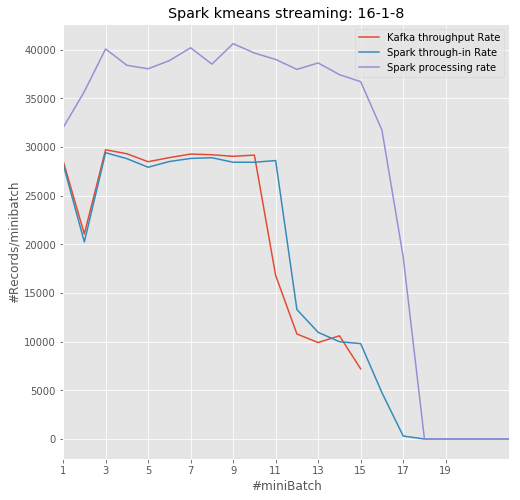

In [13]:
fig = plt.figure()
fig.set_size_inches(8,8)
ax = plt.axes()


ax.set_title('Spark kmeans streaming: 16-1-8')
ax.set_xlim([1,22])
ax.set_xticks([1,3,5,7,9,11,13,15,17,19])
ax.set_xlabel('#miniBatch')
ax.set_ylabel('#Records/minibatch')


#throughput rate
ax.plot(throughput_p814_1[0],throughput_p814_1[1],label='Kafka throughput Rate') 

# through-in rate
ax.plot(throughin_814[0],throughin_814[1],label='Spark through-in Rate')

# processing rate .  
ax.plot(processing_records_per_second_per_batch_814[0],map(lambda x: x*60,processing_records_per_second_per_batch_814[1]),label='Spark processing rate')

ax.legend()

## Spark k-means 16-1-4

In [14]:
## all producers
producers = '16-1-4-new-settings/producers/'
adir = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/1-node/16-1-4-new-settings/producers/'
dataset =  pltme.find_producers_file(adir)


avg_production_rate_814 = pltme.find_total_producer_throughput(producers,dataset,950,False,'')
throughput_p814_1 = producer_throughtput_per_mini_batch(adir,dataset)  # record per seconds
throughin_814 = pltme.plot_throughput_per_mini_batch('16-1-4-new-settings/spark-metrics-20171027-153623.csv',1,showPlot=False)
processing_time_814 =  pltme.plot_scheduling_and_Total_Delay('16-1-4-new-settings/spark-metrics-20171027-153623.csv',1,'title',showPlot=True)
processing_records_per_second_per_batch_814 = pltme.rec_per_sec(processing_time_814,throughin_814)
average_record_throughin = pltme.find_total_consumer_throughin('16-1-4-new-settings/spark-metrics-20171027-153623.csv',17*60)  #5400
print ' Through-in rate is: %d Records/sec ' % average_record_throughin

 Through-in rate is: 348 Records/sec 


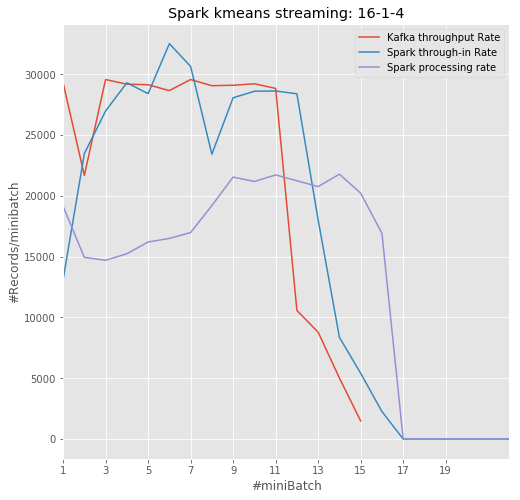

In [15]:
fig = plt.figure()
fig.set_size_inches(8,8)
ax = plt.axes()


ax.set_title('Spark kmeans streaming: 16-1-4')
ax.set_xlim([1,22])
ax.set_xticks([1,3,5,7,9,11,13,15,17,19])
ax.set_xlabel('#miniBatch')
ax.set_ylabel('#Records/minibatch')


#throughput rate
ax.plot(throughput_p814_1[0],throughput_p814_1[1],label='Kafka throughput Rate') 

# through-in rate
ax.plot(throughin_814[0],throughin_814[1],label='Spark through-in Rate')

# processing rate .  
ax.plot(processing_records_per_second_per_batch_814[0],map(lambda x: x*60,processing_records_per_second_per_batch_814[1]),label='Spark processing rate')

ax.legend()